# Analisi performance contenuti Instagram

In un panorama digitale sempre più competitivo, comprendere cosa rende un contenuto social di successo è fondamentale per qualsiasi strategia di marketing digitale. 

Questo notebook presenta un'analisi delle performance sui contenuti Instagram dell'intero 2024 di una pagina che si occupa di promuovere contenuti educativi.

>**_Nota_**: ai fini di poter condividere il mio lavoro di analisi  ho dovuto escludere determinate variabili che avrebbero potuto ricondurre al pagina Instagram in questione.    
Questo mi ha portato ad escludere, da questo notebook, alcune analisi più specifiche sui contenuti, per preservarne la privacy.

---

**Business question**: Quali elementi contribuiscono al successo di un contenuto su Instagram si può ottimizzare la strategia di contenuti per massimizzare l’engagement?

---


**_Fonte dei dati_** : Meta Business Suite  
**_Formato dei dati_** : CSV


## 1. Preparazione dei dati

In questa sezione si svolgeranno l'import delle librerie e pacchetti e il caricamento dei dati.

### 1.1 Caricamento pacchetti e librerie


In [1]:
# pacchetti e librerie per condurre l'analisi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

### 1.2 Importazione del dataset

In [2]:
# importo dataset
instagram2024 = pd.read_csv("data.csv")

print("caricamento ok")

caricamento ok


### 1.3 Anteprima del dataframe

In [3]:
# visualizza le prime 10 righe del dataframe
instagram2024.head(10)

,Id_contenuto,durata_s,data_pubblicazione,tipo_contenuto,like,condivisioni,commenti,salvataggi,copertura,follower
0,18037066609632734,0,01/02/2024 22:30,Immagine di Instagram,440,21,1,22,6829,10
1,18259522531211584,0,03/30/2024 22:30,Immagine di Instagram,110,0,0,28,3996,0
2,18043313155671267,0,03/29/2024 23:30,Immagine di Instagram,186,2,0,14,4523,2
3,18061817290480476,0,03/29/2024 09:13,Carosello di Instagram,204,10,3,4,3630,1
4,18425054275038157,135,03/29/2024 01:54,Reel di Instagram,795,6,20,41,11431,7
5,17998128917323574,0,03/27/2024 23:30,Immagine di Instagram,90,3,0,4,3304,0
6,18021265232111094,0,03/27/2024 06:48,Carosello di Instagram,346,9,8,8,4694,3
7,18003744629437661,89,03/27/2024 02:43,Reel di Instagram,150,4,0,11,4969,1
8,18389456431072764,0,03/26/2024 07:29,Carosello di Instagram,67,2,0,6,2304,0
9,17983479578648545,89,03/25/2024 09:08,Reel di Instagram,907,36,14,39,16227,15


## 2. Esplorazione e pulizia dei dati
In questa sezione:
- panoramica del dataset
- controllo della qualità dei dati
- pulizia dei dati
- costruzione variabili utili all'analisi

### 2.1 Riepilogo dei dati

In [4]:
# info() mostra informazioni generali sul DataFrame:
# - Numero totale di righe e colonne
# - Nome e tipo di ciascuna colonna
# - Conteggio dei valori non nulli per colonna
# - Tipo di dato complessivo (es. int64, float64, object)

instagram2024.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id_contenuto        388 non-null    int64 
 1   durata_s            388 non-null    int64 
 2   data_pubblicazione  388 non-null    object
 3   tipo_contenuto      388 non-null    object
 4   like                388 non-null    int64 
 5   condivisioni        388 non-null    int64 
 6   commenti            388 non-null    int64 
 7   salvataggi          388 non-null    int64 
 8   copertura           388 non-null    int64 
 9   follower            388 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 30.4+ KB


- Il dataframe ha 388 righe e 10 colonne.
- Non ci sono valori nulli.
- La colonna `data_pubblicazione` è in formato `int64`, successivamente verrà convertita in formato `datetime`

### 2.2 Pulizia dei dati

In [5]:
# describe() restituisce una riepilogo utile del dataframe. 
# mostra statistiche descrittive utili a identificare valori anomali
instagram2024.describe()

,Id_contenuto,durata_s,like,condivisioni,commenti,salvataggi,copertura,follower
count,3.880000e+02,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,1.804707e+16,57.610825,529.298969,23.463918,12.737113,43.317010,13826.304124,15.121134
std,1.396251e+14,169.279383,668.015321,35.592239,36.534829,86.653816,31615.355589,52.876613
min,1.784201e+16,0.000000,19.000000,0.000000,0.000000,0.000000,1782.000000,0.000000
25%,1.797289e+16,0.000000,147.750000,4.000000,1.000000,6.000000,4442.500000,1.000000
50%,1.802700e+16,0.000000,327.000000,9.500000,3.000000,19.000000,7180.500000,3.000000
75%,1.806652e+16,80.000000,673.000000,29.000000,11.000000,47.000000,13464.500000,9.000000
max,1.846888e+16,2080.000000,5159.000000,242.000000,418.000000,1062.000000,427316.000000,696.000000


Un check del riepilogo mostra che non sono stati riscontrati outlier significativi né valori negativi degni di nota.

**Controllo duplicati**. 

Verificherò la presenza di duplicati nella colonna `Id_contentuto`, unica variabile che dovrebbe contenere esclusivamente valori univoci.

In [6]:
# controllo duplicati nella colonna "Id_contenuto"
instagram2024["Id_contenuto"].duplicated().sum()

np.int64(0)

Non sono presenti valori duplicati.

**Pulizia**

Per garantire un'analisi dei dati efficiente e coerente, preferisco standardizzare e semplificare i nomi delle categorie. 

Ridurre stringhe lunghe come "Immagine di Instagram" in nomi più concisi e uniformi come "immagine" rende il codice più leggibile, riduce gli errori e facilita le operazioni di raggruppamento e filtraggio dei dati.

Procedo a:
- verificare i nomi delle variabili categoriche
- rinominare le voci

In [7]:
#verifico le categorie univoche in "tipo_contenuto"
instagram2024["tipo_contenuto"].unique()

array(['Immagine di Instagram', 'Carosello di Instagram',
       'Reel di Instagram'], dtype=object)

Ora procederò a rinominare le voci. Per farlo costruirò un dizionario in cui inserirò i nuovi valori e le voci da sostituire.

In [8]:
# creazione dizionario per le sostituzioni
mappa_sostituzioni = {
    "Immagine di Instagram": "immagine",
    "Carosello di Instagram": "carosello",
    "Reel di Instagram": "reel"
}

#applico le sostituzione con il metodo replace
instagram2024["tipo_contenuto"] = instagram2024["tipo_contenuto"].replace(mappa_sostituzioni)

#verifica
instagram2024["tipo_contenuto"].unique()

array(['immagine', 'carosello', 'reel'], dtype=object)

## 3. Elaborazione

In questa sezione verranno:

- conversione `data_pubblicazione` in formato datetime
- create nuove variabili da quelle esistenti (time, weekday, fascia_oraria, engagement_rate)

### 3.1 Elaborazione variabili temporali

Procedo a:
- convertire la colonna `data_pubblicazione_ in formato datetime (%m%d%Y %H%M)
- correggere il fuso orario
- estrarre giorno della settimana e orario e creare due nuove variabili
- creazione variabile categoriale sulla fascia di orario

In [9]:
#converto la colonna "data_pubblicazione" in formato datetime %m%d%y
instagram2024["data_pubblicazione"] = pd.to_datetime(instagram2024["data_pubblicazione"], format = "%m/%d/%Y %H:%M")

#verifico conversione
instagram2024["data_pubblicazione"].dtype

dtype('<M8[ns]')

**Conversione fuso orario**

I dati scaricati da Meta Business Suite sono registrati con il fuso orario della sede di Meta in California. Per garantire che l'analisi sia coerente con il contesto temporale locale, è necessario convertire tutti i timestamp nel fuso orario italiano.

In [10]:
# Correggo il fuso orario della colonna "data_pubblicazione" aggiungendo 9 ore
instagram2024["data_pubblicazione"] = instagram2024["data_pubblicazione"] + pd.to_timedelta("9 hours")

# ordino il dataframe per data
instagram2024.sort_values("data_pubblicazione", inplace=True)

# prime 5 voci
instagram2024.head()



,Id_contenuto,durata_s,data_pubblicazione,tipo_contenuto,like,condivisioni,commenti,salvataggi,copertura,follower
0,18037066609632734,0,2024-01-03 07:30:00,immagine,440,21,1,22,6829,10
102,18028728205829229,0,2024-01-04 07:30:00,immagine,206,11,7,7,4227,0
101,18008919614490760,60,2024-01-05 08:01:00,reel,92,1,0,2,4291,3
100,18245506138242189,21,2024-01-08 12:34:00,reel,836,2,6,49,30342,291
99,18016083656078605,0,2024-01-09 07:30:00,carosello,62,0,0,3,2196,0


**Estrazione giorni della settimana e orari**

Ora, attraverso il metodo `datetime` estraggo il giorno della settimana e l'orario e ne creo due colonne separate.

In [11]:
# Creazione di colonne per giorno della settimana e ora
instagram2024["weekday"] = instagram2024["data_pubblicazione"].dt.strftime("%a")
instagram2024["time"] = instagram2024["data_pubblicazione"].dt.hour

#verifica
instagram2024.head()

,Id_contenuto,durata_s,data_pubblicazione,tipo_contenuto,like,condivisioni,commenti,salvataggi,copertura,follower,weekday,time
0,18037066609632734,0,2024-01-03 07:30:00,immagine,440,21,1,22,6829,10,Wed,7
102,18028728205829229,0,2024-01-04 07:30:00,immagine,206,11,7,7,4227,0,Thu,7
101,18008919614490760,60,2024-01-05 08:01:00,reel,92,1,0,2,4291,3,Fri,8
100,18245506138242189,21,2024-01-08 12:34:00,reel,836,2,6,49,30342,291,Mon,12
99,18016083656078605,0,2024-01-09 07:30:00,carosello,62,0,0,3,2196,0,Tue,7


**Creazione variabile "fascia_giornata"**

Verifico quali orari sono presenti per costruire delle categorie coerenti

In [12]:
sorted(instagram2024["time"].unique())

[np.int32(7),
 np.int32(8),
 np.int32(9),
 np.int32(10),
 np.int32(11),
 np.int32(12),
 np.int32(13),
 np.int32(14),
 np.int32(15),
 np.int32(16),
 np.int32(17),
 np.int32(18),
 np.int32(19),
 np.int32(20),
 np.int32(21),
 np.int32(22)]

Il range di orario di pubblicazione va dalle 7 alle 22.  
Su questa base creo tre fasce orarie: mattina, pomeriggio e sera.

In [13]:
# Definire le fasce orarie
bins = [7, 12, 17, 24]
labels = ['mattina (7-12)', 'pomeriggio (12-17)', 'sera (17-22)']

# Creazione nuova colonna 'fascia_oraria'
instagram2024['fascia_oraria'] = pd.cut(instagram2024['time'], bins=bins, labels=labels, right=False)

instagram2024.head()

,Id_contenuto,durata_s,data_pubblicazione,tipo_contenuto,like,condivisioni,commenti,salvataggi,copertura,follower,weekday,time,fascia_oraria
0,18037066609632734,0,2024-01-03 07:30:00,immagine,440,21,1,22,6829,10,Wed,7,mattina (7-12)
102,18028728205829229,0,2024-01-04 07:30:00,immagine,206,11,7,7,4227,0,Thu,7,mattina (7-12)
101,18008919614490760,60,2024-01-05 08:01:00,reel,92,1,0,2,4291,3,Fri,8,mattina (7-12)
100,18245506138242189,21,2024-01-08 12:34:00,reel,836,2,6,49,30342,291,Mon,12,pomeriggio (12-17)
99,18016083656078605,0,2024-01-09 07:30:00,carosello,62,0,0,3,2196,0,Tue,7,mattina (7-12)


### 3.2 Creazione variabile engagement rate (ponderata)

Creare una variabile di **engagement rate** è importante perché permette di **misurare in modo chiaro l’interazione reale degli utenti con i contenuti**, andando oltre il semplice numero di like o commenti.
In questo modo è possibile **confrontare performance tra post diversi** e ottimizzare la strategia di pubblicazione basandosi su metriche oggettive.

Ho assegnato pesi crescenti a ogni interazione basandomi sul livello di sforzo richiesto e sul valore che questa azione rappresenta. Un'azione come il salvataggio o la condivisione indica un coinvolgimento più profondo e un valore percepito maggiore a un semplice "mi piace".

La formula per ricavare l'engagement rate:
```
engagement_rate= 
((like⋅1)+(commenti⋅3)+(condivisioni⋅4)+(salvataggi⋅5)/copertura*100
​
```


In [14]:
# Creazione di una nuova colonna chiamata 'engagement_rate'
instagram2024['engagement_r'] = (instagram2024['like'] * 1 + instagram2024['commenti'] * 3 + instagram2024['condivisioni'] * 4 + instagram2024['salvataggi'] * 5)/instagram2024["copertura"]*100
#verifica
instagram2024["engagement_r"]

0      9.327866
102    7.239177
101    2.470287
100    3.648408
99     3.506375
         ...   
310    6.610445
309    3.687850
308    6.555449
307    4.684466
306    4.622841
Name: engagement_r, Length: 388, dtype: float64

## 4. Analisi 

In questa sezione:
- statistiche descrittive
- distribuzione delle variabili
- contenuti più e meno coinvolgenti 
- analisi del formato di pubblicazione del contenuto
- analisi durata reel
- serie temporali

### 4.1 Statistiche descrittive

**Statistiche descrittive riassuntive con describe()**

In [15]:
instagram2024.describe()

,Id_contenuto,durata_s,data_pubblicazione,like,condivisioni,commenti,salvataggi,copertura,follower,time,engagement_r
count,3.880000e+02,388.000000,388,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,1.804707e+16,57.610825,2024-06-23 18:50:49.175257600,529.298969,23.463918,12.737113,43.317010,13826.304124,15.121134,11.082474,6.587149
min,1.784201e+16,0.000000,2024-01-03 07:30:00,19.000000,0.000000,0.000000,0.000000,1782.000000,0.000000,7.000000,0.145444
25%,1.797289e+16,0.000000,2024-03-27 14:46:45,147.750000,4.000000,1.000000,6.000000,4442.500000,1.000000,7.000000,4.352716
50%,1.802700e+16,0.000000,2024-06-18 06:28:00,327.000000,9.500000,3.000000,19.000000,7180.500000,3.000000,10.000000,6.475465
75%,1.806652e+16,80.000000,2024-09-23 11:34:00,673.000000,29.000000,11.000000,47.000000,13464.500000,9.000000,15.000000,8.546826
max,1.846888e+16,2080.000000,2024-12-30 07:30:00,5159.000000,242.000000,418.000000,1062.000000,427316.000000,696.000000,22.000000,14.136379
std,1.396251e+14,169.279383,NaN,668.015321,35.592239,36.534829,86.653816,31615.355589,52.876613,4.389134,2.976709


Alcuni **insight**:
- sono presenti **388** contenuti;
- la durata media dei Reel è di **58 secondi**, il **75%** dei contenuti ha una durata pari o inferiore a 80 secondi, la durata massima è di 2080 secondi;
- la media di like per contenuto è di **529**, il contenuto che è andato peggio ha ricevuto **19** like, quello che è andato meglio ne ha ricevuti **5159**, il **25%** dei contenuti ha ricevuto un numero di mi piace pari o superiore a **673**;
- sono presenti dei contenuti che non hanno ottenuto condivisioni o commenti o salvataggi;
- confrontando condivisioni, commenti e salvataggi si nota che i salvataggi registrano valori più alti;
- i contenuti non generano un'alto tasso di acquisizione diretta di follower;
- l'engagement rate medio è di **4,76**

**Statistiche descrittive dei tipi di contenuto**

In [21]:
# Calcolo delle statistiche riassuntive per ogni tipo di contenuto
# Questo mostra media e mediana per like e commenti per ogni categoria
performance_per_tipo = instagram2024.groupby('tipo_contenuto')[['like','commenti',"salvataggi","condivisioni","engagement_r"]].agg(['mean', 'median', 'count'])
print("Statistiche per tipo di contenuto:")
print(performance_per_tipo)
print("\n" + "-"*50 + "\n")

Statistiche per tipo di contenuto:
                      like                commenti              salvataggi  \
                      mean median count       mean median count       mean   
tipo_contenuto                                                               
carosello       280.877193  101.0    57   8.912281    0.0    57  13.982456   
immagine        390.940120  253.0   167   4.377246    1.0   167  29.000000   
reel            756.530488  529.5   164  22.579268    8.0   164  68.091463   

                            condivisioni              engagement_r            \
               median count         mean median count         mean    median   
tipo_contenuto                                                                 
carosello         5.0    57    12.157895    4.0    57     5.407296  4.592997   
immagine         20.0   167    23.748503   12.0   167     6.372668  6.257449   
reel             34.5   164    27.103659   13.0   164     7.215625  7.402702   

               

- I valori di medie e mediane, di like, commenti, salvataggi e condivisioni mostrano delle grandi differenze. Questo suggerisce di analizzare nel dettaglio la distribuzione di questi valori per verificare la presenza di outlier.
- L'engagement rate (ER) ha normalizzare i dati, rendendo le differenze tra le medie e le mediane meno estreme rispetto a metriche assolute come i like. 

**Prossimo passo**: verificare la distribuzione delle variabili e outlier

### 4.2 Distribuzione delle variabili

**Distribuzione like, commenti, condivisioni e salvataggi.**

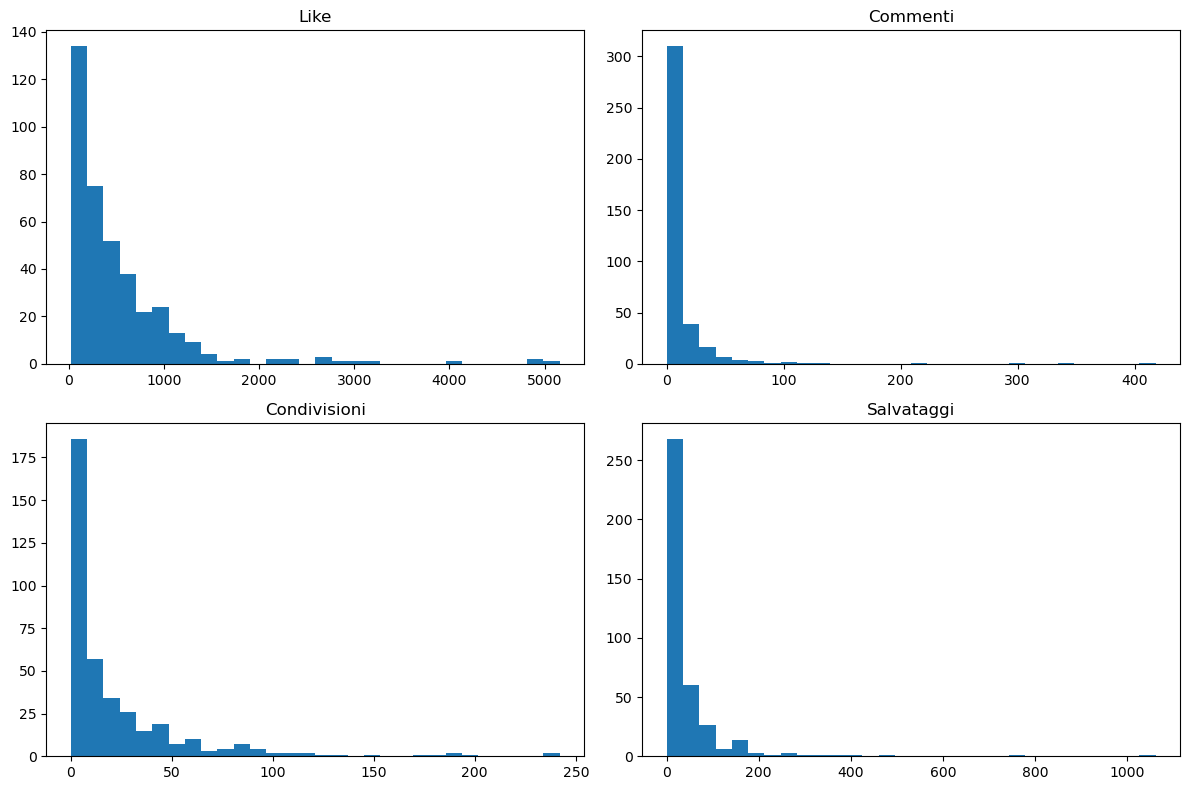

In [ ]:
# Un semplice subplot con 4 metriche
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0,0].hist(instagram2024['like'], bins=30)
axes[0,0].set_title('Like')
axes[0,1].hist(instagram2024['commenti'], bins=30)
axes[0,1].set_title('Commenti')
axes[1,0].hist(instagram2024['condivisioni'], bins=30)
axes[1,0].set_title('Condivisioni')
axes[1,1].hist(instagram2024['salvataggi'], bins=30)
axes[1,1].set_title('Salvataggi')
plt.tight_layout()

**Distribuzione engagement rate**

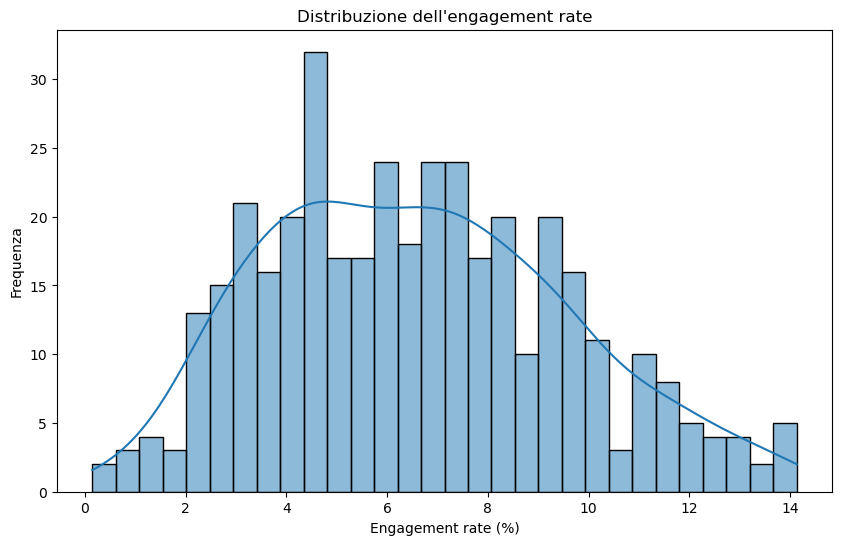

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=instagram2024, x='engagement_r', bins=30, kde=True)
plt.title('Distribuzione dell\'engagement rate')
plt.xlabel('Engagement rate (%)')
plt.ylabel('Frequenza')
plt.show()

La distribuzione delle metriche principali segua una distribuzione a coda lunga, questo significa che la maggiorparte delle interazione rientra in determinato range e sono presenti alcuni valori anomali che rappresentano i contenuti che sono stati eccezionalmente performanti.

Questo evidenzia l'importanza di non basarsi unicamente su metriche aggregate come la media che può essere fuorviata da pochi contenuti di successo.

Per un'analisi più efficace includerò l'uso della metrica dell'engagement rate perché, a differenza delle singole metriche con la loro distribuzione a coda lunga, normalizza i dati rispetto alla copertura. Questo fornisce una visione più equilibrata ed equa, rendendo i confronti tra i contenuti più affidabili e riducendo l'impatto distorsivo dei pochi post eccezionalmente performanti.

#### **Matrice di correlazione delle metriche di engagement e visualizzazione con heatmap**

Dopo aver creato un engagement rate ponderato, l'analisi della matrice di correlazione è cruciale per capirne il comportamento. La correlazione tra le metriche di engagement (like, commenti, ecc.) ci aiuta a verificare se le azioni degli utenti tendono a verificarsi insieme e a convalidare la logica dietro l'assegnazione dei pesi. Se le correlazioni sono basse, significa che stiamo catturando aspetti diversi del coinvolgimento e che la ponderazione è giustificata.

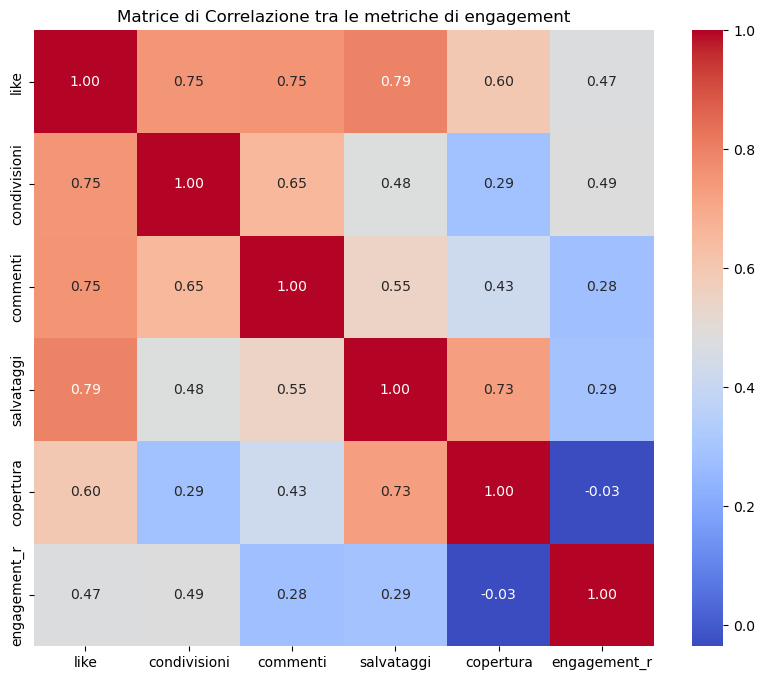

In [27]:
# Seleziona solo le colonne numeriche rilevanti
df_numerico = instagram2024[["like", "condivisioni", "commenti", "salvataggi", "copertura", "engagement_r"]]

# Calcola la matrice di correlazione
matrice_correlazione = df_numerico.corr()

# Visualizza la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlazione, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione tra le metriche di engagement')
plt.show()

>_Note sul grafico_ : 
- Le metriche (like, commenti, ecc.) sono diverse, ma un po' correlate tra loro. Questo è un bene. Se fossero state correlate in modo quasi perfetto, i pesi che ho assegnato non avrebbero avuto senso. Dato che la correlazione non è perfetta, i pesi differenziati sono giustificati perché sto misurando azioni diverse.

- L'engagement rate ponderatoha una bassa correlazione con ciascuna delle singole metriche (come i like da soli, i commenti da soli, ecc.). Anche questo è un bene, perché significa che la metrica non è influenzata e dominata da una sola di esse. Invece, rappresenta una visione complessiva e bilanciata di tutte le interazioni, rendendola uno strumento più affidabile per l'analisi.

#### **Conclusioni sulla correlazione**
L'analisi di correlazione ha fornito insight importanti sulle metriche di engagement:

- **Salvataggi e mi piace**: Con un valore di 0.79, è la correlazione più forte. Ciò suggerisce che i post che piacciono di più sono anche quelli che le persone tendono a salvare.

- **Mi piace e commenti/condivisioni**: Con valori di 0.75, queste metriche sono fortemente legate. Chi mette un "mi piace" è molto propenso anche a commentare o a condividere.

- **Salvataggi e copertura**: Un valore di 0.73 indica una forte correlazione. Questo è un dato cruciale: i salvataggi sono fortemente associati a una maggiore copertura. Ciò suggerisce che l'algoritmo di Instagram potrebbe dare molta importanza ai salvataggi per spingere i post.

- **Copertura e engagement non sono correlate**: La correlazione tra copertura e engagement_rate è quasi inesistente (-0.08). Questo smentisce l'idea che una maggiore visibilità porti automaticamente a un più alto tasso di interazione.

### 4.3 Contenuti più e meno coinvolgenti 

Utilizzando la metrica chiave dell'engagement rate, sono stati filtrati i contenuti più performanti e i meno performanti.

**Top 5**

In [28]:
instagram2024.sort_values(by="engagement_r", ascending=False).head(5)[["Id_contenuto", "engagement_r", "tipo_contenuto"]]


,Id_contenuto,engagement_r,tipo_contenuto
244,18361477315107751,14.136379,reel
86,18025252711911530,14.019186,carosello
140,17983095245520152,13.867363,reel
89,18095215006384069,13.836189,reel
54,18017785402898238,13.736170,immagine


**Bottom 5**

In [29]:
instagram2024.sort_values(by="engagement_r", ascending=True).head(5)[["Id_contenuto", "engagement_r", "tipo_contenuto"]]

,Id_contenuto,engagement_r,tipo_contenuto
216,17927531099952376,0.145444,reel
235,18066295747612313,0.363351,reel
108,17872273371082875,0.719424,carosello
222,17870242767125546,1.025151,reel
276,17948669531821322,1.058710,immagine


>_Nota_ : questa sezione presenta i 5 contenuti con il più alto e il più basso engagement, basandosi esclusivamente sui dati di id_contenuto forniti.

>Per un'analisi più completa, che ho svolto originariamente, ho creato variabili categoriche su argomenti, temi e tipologia di contenuto. Ho poi esaminato la correlazione tra queste variabili e le metriche di engagement. In questo modo è stato possibile determinare i fattori chiave del successo dei contenuti.

### 4.4 Analisi del formato di pubblicazione del contenuto

**Panoramica della distribuzione e conteggio di formato di pubblicazione**

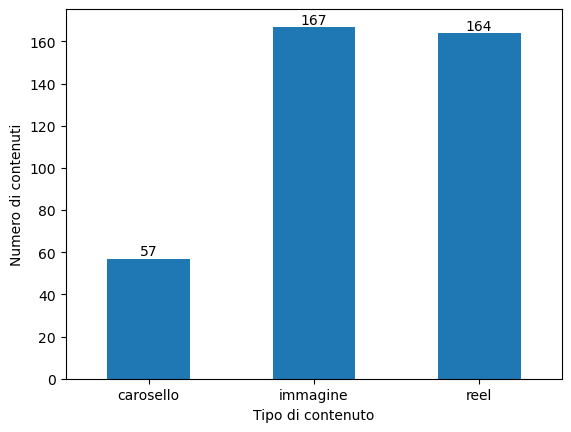

Distribuzione contenuti:
     - Reel: 42.3%
     - Immagini: 43.0%
     - Caroselli: 14.7%


In [22]:
# Distribuzione dei tipi di contenuto
distribuzione_contenuti = instagram2024.groupby("tipo_contenuto").size()

#------ Grafico ----
#grafico a barre
distribuzione_contenuti.plot(kind="bar", rot=0)
plt.ylabel("Numero di contenuti")
plt.xlabel("Tipo di contenuto")
# Mostrare valori sopra le barre 
plt.bar_label(plt.gca().containers[0])
plt.show()
#--------------------

#---- Percentuale tipi di contenuto ---
conteggi = instagram2024["tipo_contenuto"].value_counts()
totale = len(instagram2024)

print(f"""Distribuzione contenuti:
     - Reel: {conteggi['reel']/totale*100:.1f}%
     - Immagini: {conteggi['immagine']/totale*100:.1f}%
     - Caroselli: {conteggi['carosello']/totale*100:.1f}%""")



Reel e immagini sono i formati più usati per le pubblicazioni.

**Analisi formato più performante in termini di engagement rate**

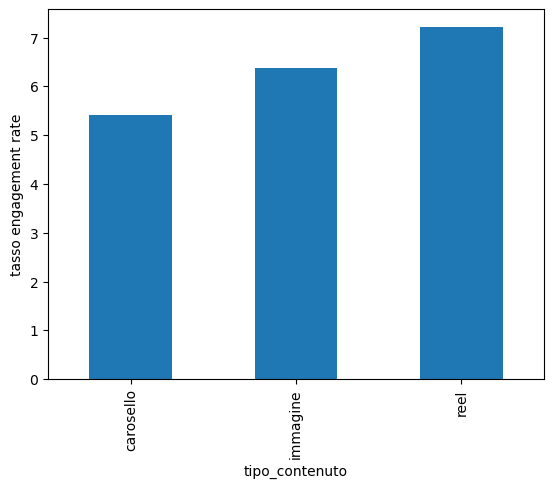

In [23]:
formato_performante = instagram2024.groupby("tipo_contenuto")["engagement_r"].mean()

formato_performante.plot(kind="bar")
plt.ylabel("tasso engagement rate")
plt.show()

>_Osservazione_ : dato che si sono osservate differenze tra i formati, procediamo con un test ANOVA per verificare se queste differenze siano statisticamente significative.

#### **test ANOVA sull'ipotesi di formato più performante**

In [34]:
immagine = instagram2024[instagram2024["tipo_contenuto"] == "immagine"]["engagement_r"]
reel = instagram2024[instagram2024["tipo_contenuto"] == "reel"]["engagement_r"]
carosello = instagram2024[instagram2024["tipo_contenuto"] == "carosello"]["engagement_r"]

f_stat, p_value = stats.f_oneway(immagine, reel, carosello)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.3f}")

F-statistic: 8.92, P-value: 0.000


L’ANOVA mostra che il formato di pubblicazione influenza significativamente l’engagement rate e conferma statisticamente che le differenze tra categorie non sono dovute al caso.

### 4.5 Analisi reel

Allo scopo di comprendere meglio quale formato di reel converte meglio, effettuerò ulteriori analisi confrontanto le durate dei video per scoprire possibili correlazioni.

In [35]:
instagram_reel = instagram2024[instagram2024["tipo_contenuto"] == "reel"].copy()
instagram_reel.head()

,Id_contenuto,durata_s,data_pubblicazione,tipo_contenuto,like,condivisioni,commenti,salvataggi,copertura,follower,weekday,time,fascia_oraria,engagement_r
101,18008919614490760,60,2024-01-05 08:01:00,reel,92,1,0,2,4291,3,Fri,8,mattina (7-12),2.470287
100,18245506138242189,21,2024-01-08 12:34:00,reel,836,2,6,49,30342,291,Mon,12,pomeriggio (12-17),3.648408
98,18033686371706762,78,2024-01-10 11:11:00,reel,130,3,2,6,4025,2,Wed,11,mattina (7-12),4.422360
96,18001731164366762,90,2024-01-12 10:15:00,reel,983,46,5,118,25765,39,Fri,10,mattina (7-12),6.877547
93,18031792999790534,38,2024-01-15 10:26:00,reel,633,10,1,39,14933,17,Mon,10,mattina (7-12),5.832719


Dopo aver filtrato i soli dati sui reel, cerco di vedere se esiste una correlazione tra durata e le altre metriche.

Per semplificare l'analisi creo delle categorizzazioni della durata dei reel.

In [36]:
bins = [0, 15, 30, 60, 90, 120, float('inf')]
labels = ["0-15s", "16-30s", "31-60s", "61-90s", "91-120s", ">120s"]

instagram_reel.loc[:, "categoria_durata"] = pd.cut(
    instagram_reel["durata_s"],
    bins=bins,
    labels=labels,
    right=True
)


instagram_reel.head()

,Id_contenuto,durata_s,data_pubblicazione,tipo_contenuto,like,condivisioni,commenti,salvataggi,copertura,follower,weekday,time,fascia_oraria,engagement_r,categoria_durata
101,18008919614490760,60,2024-01-05 08:01:00,reel,92,1,0,2,4291,3,Fri,8,mattina (7-12),2.470287,31-60s
100,18245506138242189,21,2024-01-08 12:34:00,reel,836,2,6,49,30342,291,Mon,12,pomeriggio (12-17),3.648408,16-30s
98,18033686371706762,78,2024-01-10 11:11:00,reel,130,3,2,6,4025,2,Wed,11,mattina (7-12),4.422360,61-90s
96,18001731164366762,90,2024-01-12 10:15:00,reel,983,46,5,118,25765,39,Fri,10,mattina (7-12),6.877547,61-90s
93,18031792999790534,38,2024-01-15 10:26:00,reel,633,10,1,39,14933,17,Mon,10,mattina (7-12),5.832719,31-60s


**Confronto tra metriche e durata dei reel**

In [44]:
instagram_reel.groupby("categoria_durata", observed=True)[["engagement_r","like","condivisioni","follower","salvataggi"]].mean().round(2)


,engagement_r,like,condivisioni,follower,salvataggi
categoria_durata,,,,,
16-30s,3.21,364.00,3.67,99.00,19.00
31-60s,5.12,564.93,14.10,24.53,36.33
61-90s,7.56,778.56,30.13,24.41,64.93
91-120s,5.84,605.88,23.69,24.94,43.31
>120s,8.84,929.73,33.84,37.22,106.27


>_Osservazione_ : dato che si è osservato, attraverso le analisi descrittive che, i contenuti con durata superiore a 120 secondi ottengono performance migliori in tutte le metriche considerate, procedo con un test ANOVA per verificare se queste differenze siano statisticamente significative.

#### **test ANOVA: contenuti superiori a 120 secondi**

In [52]:
# Creazione di un array di engagement rate per ogni categoria di durata
# ho escluso 0-15 perché non ci sono voci

er_16_30s = instagram_reel[instagram_reel['categoria_durata'] == '16-30s']['engagement_r']
er_31_60s = instagram_reel[instagram_reel['categoria_durata'] == '31-60s']['engagement_r']
er_61_90s = instagram_reel[instagram_reel['categoria_durata'] == '61-90s']['engagement_r']
er_91_120s = instagram_reel[instagram_reel['categoria_durata'] == '91-120s']['engagement_r']
er_120s_plus = instagram_reel[instagram_reel['categoria_durata'] == '>120s']['engagement_r']

In [53]:
f_statistic, p_value = stats.f_oneway(
    er_16_30s,
    er_31_60s,
    er_61_90s,
    er_91_120s,
    er_120s_plus
)

print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

F-statistic: 10.24
P-value: 0.000


L’ ANOVA mostra che la durata dei reel influenza significativamente l’engagement rate: le differenze tra categorie non sono dovute al caso.


### 4.6 Analisi temporali

**Andamento engagement rate nel tempo**


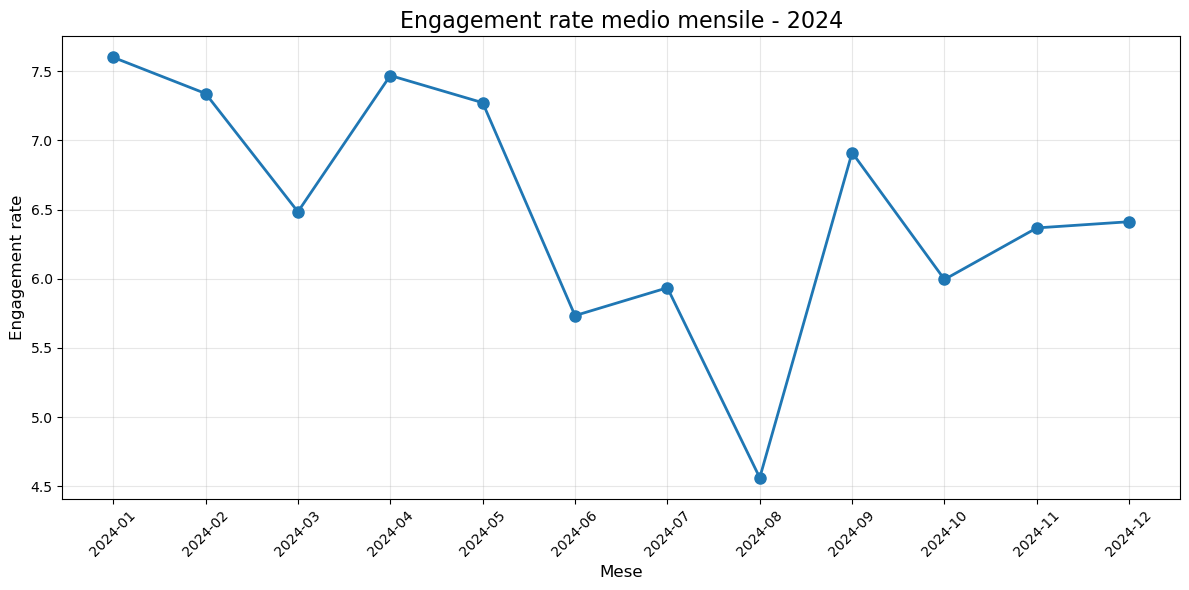

In [46]:
# Raggruppa per mese e calcola la media dell'engagement rate
monthly_engagement = instagram2024.groupby(instagram2024['data_pubblicazione'].dt.to_period('M'))['engagement_r'].mean()

# Creazione il grafico mensile
plt.figure(figsize=(12, 6))
plt.plot(monthly_engagement.index.astype(str), monthly_engagement.values, 
         marker='o', linewidth=2, markersize=8)
plt.title('Engagement rate medio mensile - 2024', fontsize=16)
plt.xlabel('Mese', fontsize=12)
plt.ylabel('Engagement rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

>_Osservazione_ : il tasso di coinvolgimento registra un calo durante il periodo estivo con una netta ripresa a Settembre. Il periodo con il miglior tasso di coinvolgimento si registra a Gennaio e ad Aprile.

Nella prossima analisi verificherò se esiste una correlazione tra tipo di formato pubblicato e calo di engagement per rispondere alla domanda:
- la presenza di maggiori contenuti performanti (reel) o (caroselli) può influire sul tasso di coinvolgimento del pubblico?

### 4.7 Correlazioni

**Correlazione variazioni temporali con tipo di contenuto**

Per verificare se c'è correlazioni tra formato di contenuto e picchi o cali di engagement farò **una crosstabulation normalizzata tra tipo di contenuto e periodi di engagement (definiti tramite quartili) e la visualizzerò con un grafico a barre per identificare quali formati performano meglio nei diversi periodi**.

=== IDENTIFICAZIONE PERIODI ===
Engagement alto (≥75° percentile): 8.55%
Engagement basso (≤25° percentile): 4.35%

Distribuzione periodi:
periodo_engagement
medio    194
alto      97
basso     97
Name: count, dtype: int64

=== CORRELAZIONE CON TIPO CONTENUTO ===
Percentuale di post per periodo di engagement:
periodo_engagement  alto  basso  medio
tipo_contenuto                        
carosello           15.8   42.1   42.1
immagine            20.4   21.6   58.1
reel                32.9   22.6   44.5


<Figure size 1200x600 with 0 Axes>

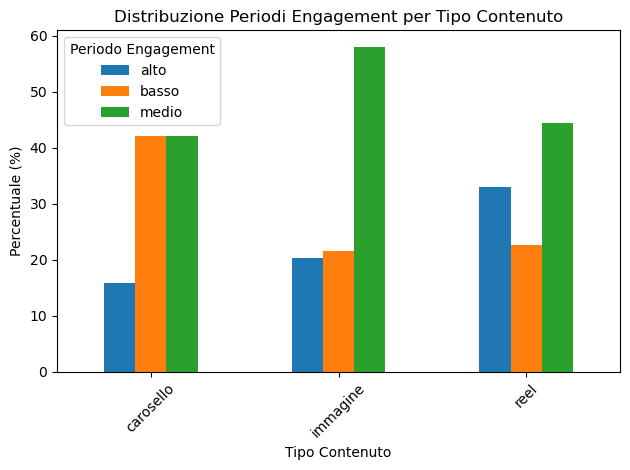

In [ ]:
# ===== PREPARAZIONE DATI TEMPORALI =====
instagram2024['mese'] = instagram2024['data_pubblicazione'].dt.month
instagram2024['giorno_mese'] = instagram2024['data_pubblicazione'].dt.day
instagram2024['settimana_anno'] = instagram2024['data_pubblicazione'].dt.isocalendar().week
instagram2024['trimestre'] = instagram2024['data_pubblicazione'].dt.quarter

# Identifico periodi di alto e basso engagement
q75 = instagram2024['engagement_r'].quantile(0.75)
q25 = instagram2024['engagement_r'].quantile(0.25)

instagram2024['periodo_engagement'] = 'medio'
instagram2024.loc[instagram2024['engagement_r'] >= q75, 'periodo_engagement'] = 'alto'
instagram2024.loc[instagram2024['engagement_r'] <= q25, 'periodo_engagement'] = 'basso'

print("=== IDENTIFICAZIONE PERIODI ===")
print(f"Engagement alto (≥75° percentile): {q75:.2f}%")
print(f"Engagement basso (≤25° percentile): {q25:.2f}%")
print(f"\nDistribuzione periodi:")
print(instagram2024['periodo_engagement'].value_counts())

print("\n=== CORRELAZIONE CON TIPO CONTENUTO ===")
contenuto_engagement = pd.crosstab(instagram2024['tipo_contenuto'], 
                                 instagram2024['periodo_engagement'], 
                                 normalize='index') * 100

print("Percentuale di post per periodo di engagement:")
print(contenuto_engagement.round(1))

# Grafico tipo contenuto
plt.figure(figsize=(12, 6))
contenuto_engagement.plot(kind='bar', stacked=False)
plt.title('Distribuzione Periodi Engagement per Tipo Contenuto')
plt.ylabel('Percentuale (%)')
plt.xlabel('Tipo Contenuto')
plt.legend(title='Periodo Engagement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

>L’analisi della crosstabulation conferma quanto osservato in precedenza: i reel dominano nei periodi di alto engagement, le immagini in quelli medi e i caroselli in quelli bassi. Questa distribuzione suggerisce che la tipologia di contenuto influisce sulle performance, con i reel che raggiungono engagement più elevati.

**Tendenze temporali generali**

weekday
Thu    7.266756
Wed    7.057771
Sat    6.845998
Fri    6.721837
Mon    6.632089
Sun    6.577875
Tue    4.961866
Name: engagement_r, dtype: float64


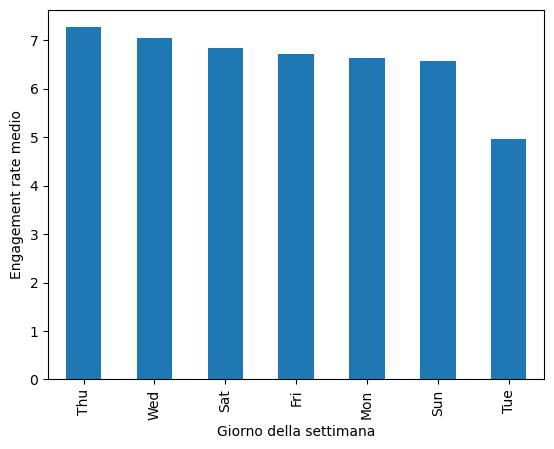

In [49]:
#creazione di una variabile che raggruppa i risultati della media 
#di engagement per giorno della settimana
media_er_weekday = instagram2024.groupby("weekday")["engagement_r"].mean().sort_values(ascending=False)
print(media_er_weekday)

#creazione grafico
media_er_weekday.plot(kind="bar")
plt.ylabel("Engagement rate medio")
plt.xlabel("Giorno della settimana")
plt.show()

Sembrerebbe che i contenuti pubblicati Giovedì e Mercoledì generino maggiore coinvolgimento.

**Heatmap per giorni e fasce orarie di engagement rate**

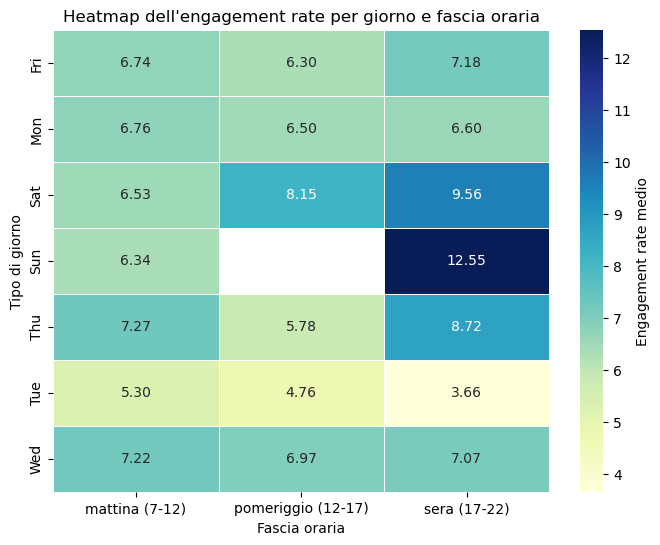

In [50]:
# 1. Riorganizzo i dati usando le nuove categorie con pivot
dati_heatmap = instagram2024.pivot_table(
    values="engagement_r",
    index="weekday",
    columns="fascia_oraria",
    aggfunc="mean",
    observed=True
)

# 2. Creo la nuova heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    dati_heatmap,
    cmap="YlGnBu",
    annot=True,
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Engagement rate medio'}
)

plt.title("Heatmap dell'engagement rate per giorno e fascia oraria")
plt.xlabel("Fascia oraria")
plt.ylabel("Tipo di giorno")
plt.show()

> _Osservazioni_ :

- **Punte più alti nel weekend**: L'engagement rate è significativamente più elevato nel fine settimana, in particolare la domenica (Sun) e il sabato (Sat), soprattutto nelle fasce orarie serali. Il picco massimo si registra la domenica sera (12.55).

- **Orario serale dominante**: In generale, la fascia oraria serale (17-22) mostra i valori più alti di engagement rate per quasi tutti i giorni della settimana, confermandosi come il momento migliore per pubblicare.

- **Performance bassa martedì**: Il martedì (Tue) è il giorno con l'engagement rate più basso in tutte le fasce orarie.

- **Fasce orarie mattutine e pomeridiane**: Le fasce orarie mattutine (7-12) e pomeridiane (12-17) hanno engagement rate più simili tra loro e generalmente inferiori a quelli serali.

## 5. Conclusioni

### Cosa ho scoperto
1. I reel con durata sopra i 120 secondi sono il formato preferito dagli utenti. La durata media dei Reel è di 58 secondi, ma quelli più lunghi ottengono risultati migliori.
2. I contenuti pubblicati la sera ottengono i risultati migliori, in particolare nel weekend. I contenuti pubblicati il martedì ricevono un basso tasso di coinvolgimento.
3. I caroselli riducono l'engagement. Nei mesi in cui il formato predominante è il carosello, si registra un picco del calo di coinvolgimento.
4. I salvataggi sono la metrica chiave per la copertura: la forte correlazione (0.73) con i salvataggi indica che Instagram privilegia i contenuti salvati. Inoltre, i salvataggi sono la metrica di interazione più alta, superando commenti e condivisioni.
5. L'engagement è slegato dalla copertura. La correlazione tra copertura ed engagement rate è quasi inesistente (−0.08), smentendo l'idea che una maggiore visibilità porti automaticamente a un più alto tasso di interazione.

### Cosa consiglio
1. Sperimentare con reel più lunghi e aumentarne la produzione oltre i due minuti, dato che questo formato è quello preferito dagli utenti e sembra essere in linea con un profilo che tratta contenuti educativi.
2. Ridurre l'uso dei caroselli. Limita l'uso di questo formato, poiché sembra non essere efficace per il tuo pubblico.
3. Pianificare la pubblicazione deicontenuti migliori per le serate del weekend. Questo è il momento in cui ottengono i risultati più alti.
4. Creare contenuti che gli utenti trovino utili o educativi e che quindi desiderano salvare. Esempi includono guide, tutorial, liste e "dritte".
5. Dato che la copertura non garantisce un alto tasso di interazione, punta su contenuti che stimolino commenti e condivisioni, come domande aperte o call-to-action mirate, per migliorare il tasso di engagement medio.


### Limiti
- È importante notare che l'analisi si basa sui dati del 2024. Dato che gli algoritmi di Instagram e le preferenze del pubblico sono in continua evoluzione, i risultati potrebbero non essere rappresentativi del futuro. Nuovi formati o modifiche all'algoritmo potrebbero cambiare radicalmente il panorama dei contenuti, rendendo necessario un monitoraggio costante e un'analisi periodica per mantenere le strategie aggiornate.

### Prossimi passi
1. Implementare le raccomandazioni
2. Misurare i risultati tra 2 mesi, monitorando in particolare l'andamento dei salvataggi, dell'engagement rate e della crescita dei follower per verificare l'efficacia delle modifiche apportate.


